In [1]:
import torch
import torch.nn as nn
import torchvision.transforms as transforms
import torchvision.datasets as dsets
import matplotlib.pylab as plt
import numpy as np
def show_data(data_sample):
    plt.imshow(data_sample[0].numpy().reshape(image_size, image_size), cmap = 'gray')
    plt.title('y = ' + str(data_sample[1].item()))

In [2]:
image_size = 16
composed = transforms.Compose([transforms.Resize((image_size, image_size)), transforms.ToTensor()])

In [5]:
train_dataset = dsets.MNIST(root = './data', train = True, download = True, transform = composed)
validation_dataset = dsets.MNIST(root = './data', train = False, download = True, transform = composed)

In [6]:
train_dataset[0][1].type()

AttributeError: 'int' object has no attribute 'type'

In [7]:
train_dataset[3][1]

1

AttributeError: 'int' object has no attribute 'item'

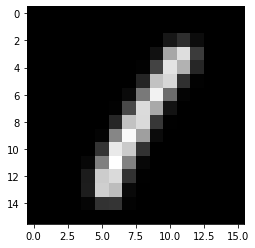

In [8]:
show_data(train_dataset[3])

In [21]:
class CNN(nn.Module):
    def __init__(self, out_1 = 16, out_2 = 32):
        super(CNN, self).__init__()
        self.cnn1 = nn.Conv2d(in_channels = 1, out_channels = out_1, kernel_size = 5, padding = 2)
        self.maxpool1 = nn.MaxPool2d(kernel_size = 2)
        self.cnn2 = nn.Conv2d(in_channels = out_1, out_channels = out_2, kernel_size = 5, stride = 1, padding = 2)
        self.maxpool2 = nn.MaxPool2d(kernel_size = 2)
        self.fc1 = nn.Linear(out_2 * 4 * 4, 10)
    def forward(self, x):
        x = self.cnn1(x)
        x = torch.relu(x)
        x = self.maxpool1(x)
        x = self.cnn2(x)
        x = torch.relu(x)
        x = self.maxpool2(x)
        x = x.view(x.size(0), -1)
        x = self.fc1(x)
        return x

In [31]:
class CNN_batch(nn.Module):
    
    # Contructor
    def __init__(self, out_1=16, out_2=32,number_of_classes=10):
        super(CNN_batch, self).__init__()
        self.cnn1 = nn.Conv2d(in_channels=1, out_channels=out_1, kernel_size=5, padding=2)
        self.conv1_bn = nn.BatchNorm2d(out_1)

        self.maxpool1=nn.MaxPool2d(kernel_size=2)
        
        self.cnn2 = nn.Conv2d(in_channels=out_1, out_channels=out_2, kernel_size=5, stride=1, padding=2)
        self.conv2_bn = nn.BatchNorm2d(out_2)

        self.maxpool2=nn.MaxPool2d(kernel_size=2)
        self.fc1 = nn.Linear(out_2 * 4 * 4, number_of_classes)
        self.bn_fc1 = nn.BatchNorm1d(10)
    
    # Prediction
    def forward(self, x):
        x = self.cnn1(x)
        x = self.conv1_bn(x)
        x = torch.relu(x)
        x = self.maxpool1(x)
        x = self.cnn2(x)
        x = self.conv2_bn(x)
        x = torch.relu(x)
        x = self.maxpool2(x)
        x = x.view(x.size(0), -1)
        x = self.fc1(x)
        x=self.bn_fc1(x)
        return x

In [23]:
def train_model(model, train_loader, validation_loader, optimizer, epochs = 4):
    n_test = len(validation_dataset)
    accuracy_list = []
    loss_list = []
    for epoch in range(epochs):
        for x, y in train_loader:
            model.train()
            optimizer.zero_grad()
            z = model(x)
            loss = criterion(z, y)
            loss.backward()
            optimizer.step()
            loss_list.append(loss.data)
        correct = 0
        for x_test, y_test in validation_loader:
            model.eval()
            z = model(x_test)
            _, y_hat = torch.max(z.data, 1)
            correct += (y_hat == y_test).sum().item()
        accuracy = correct / n_test
        accuracy_list.append(accuracy)
    return accuracy_list, loss_list

In [24]:
model = CNN(out_1 = 16, out_2 = 32)
criterion = nn.CrossEntropyLoss()
learning_rate = 0.1
optimizer = torch.optim.SGD(model.parameters(), lr = learning_rate)
train_loader = torch.utils.data.DataLoader(dataset = train_dataset, batch_size = 100)
validation_loader = torch.utils.data.DataLoader(dataset = validation_dataset, batch_size = 5000)

In [25]:
accuracy_list_normal, loss_list_normal = train_model(model = model, epochs = 10, train_loader = train_loader, validation_loader = validation_loader, optimizer = optimizer)

In [32]:
model_batch = CNN_batch(out_1 = 16, out_2 = 32)
criterion = nn.CrossEntropyLoss()
learning_rate = 0.1
optimizer = torch.optim.SGD(model_batch.parameters(), lr = learning_rate)
accuracy_list_batch, loss_list_batch = train_model(model = model_batch, epochs = 10, train_loader = train_loader, validation_loader = validation_loader, optimizer = optimizer)

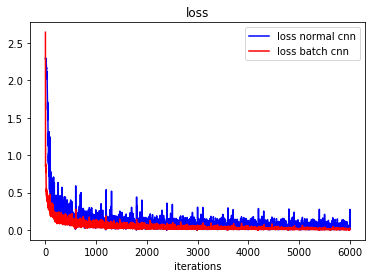

In [33]:
plt.plot(loss_list_normal, 'b', label = 'loss normal cnn')
plt.plot(loss_list_batch, 'r', label = 'loss batch cnn')
plt.xlabel('iterations')
plt.title('loss')
plt.legend()
plt.show()

NameError: name 'accyracy_list_batch' is not defined

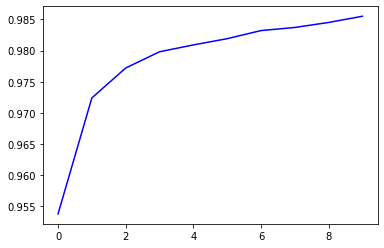

In [34]:
plt.plot(accuracy_list_normal, 'b', label = 'normal cnn')
plt.plot(accuracy_list_batch, 'r', label = 'cnn with batch norm')
plt.xlabel('epoch')
plt.title('accuracy')
plt.legend()
plt.show()